In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import graphviz as gz

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Ion_Channel/Kaggle_dataset/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Ion_Channel/Kaggle_dataset/test.csv')
train_df.head()

,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0


## Data plot

#### All point time vs signal plot


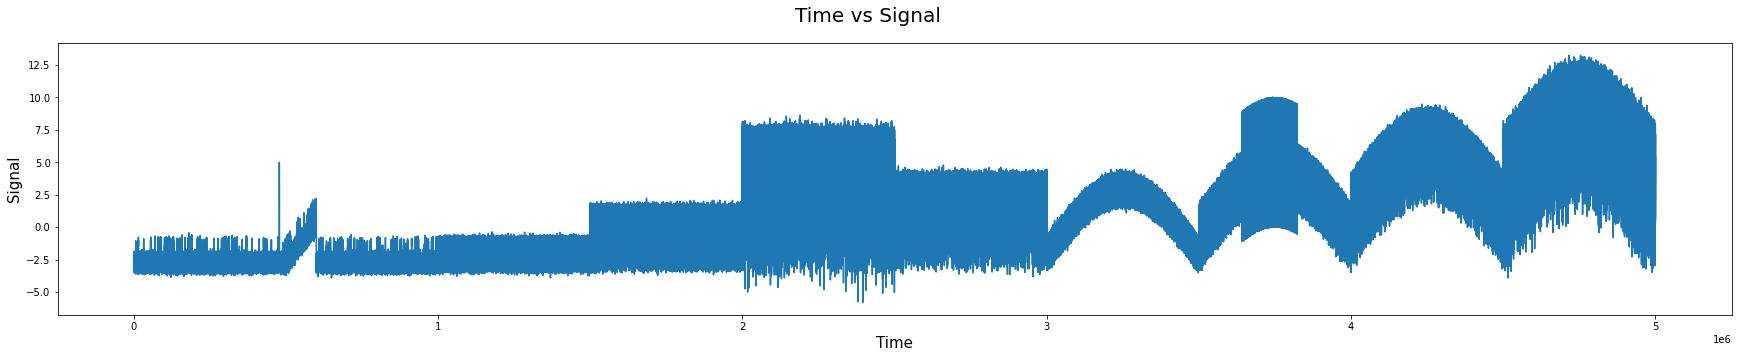

In [0]:
# Plot of time against signal values
fig = plt.figure(figsize=(30, 5))
# All point plot
plt.plot(range(0, len(train_df['time'])), train_df['signal'])
fig.suptitle('Time vs Signal', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
plt.show()

#### time vs signal plot

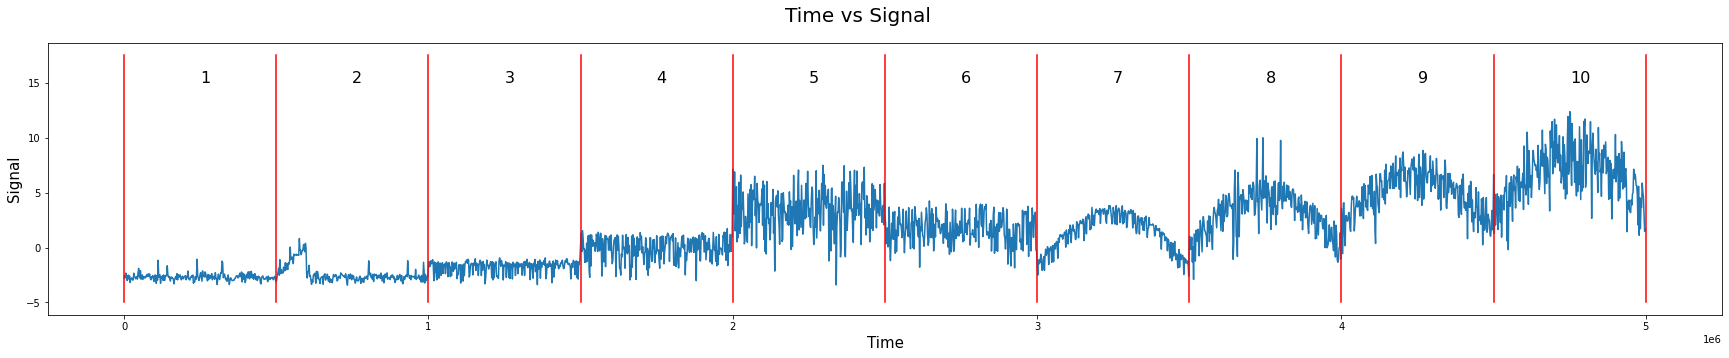

In [0]:
# Better readability
fig = plt.figure(figsize=(30, 5))
# Every 2000th point has been plotted
plt.plot(range(0, len(train_df['time']), 2000), train_df['signal'][0::2000])
fig.suptitle('Time vs Signal', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
for x in range(0, int(len(train_df['time'])+1), int(len(train_df['time'])/10)):
    plt.plot([x, x], [-5, 17.5], 'r')
for x in range(0, 10):    
    plt.text(x*500000+250000, 15, str(x+1), fontsize=16)
plt.show()

# The drift is evident from this plot

#### All point time vs signal rolling mean plot


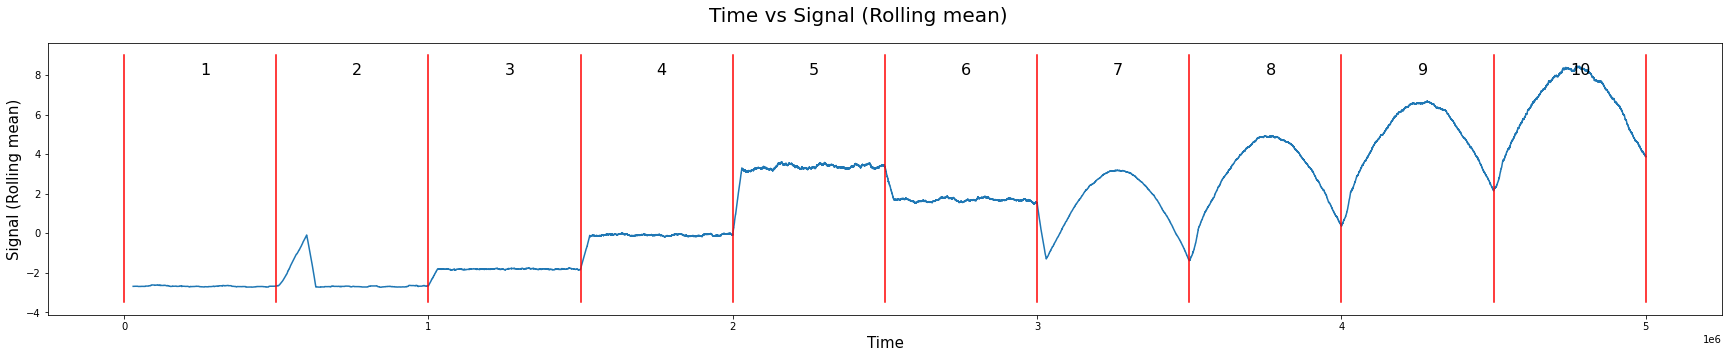

In [0]:
# Better readability of the drift in the data
#  Rolling mean method

train_roll_mean = train_df['signal'].copy()
# Rolling window reduces the coarseness of the signal and gives us a clear picture
train_roll_mean = train_roll_mean.rolling(30000).mean() # sakobe
fig = plt.figure(figsize=(30, 5))
plt.plot(train_roll_mean)
fig.suptitle('Time vs Signal (Rolling mean)', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal (Rolling mean)', fontsize=15)
for x in range(0, int(len(train_df['time'])+1), int(len(train_df['time'])/10)):
    plt.plot([x, x], [-3.5, 9], 'r')
for x in range(0, 10):    
    plt.text(x*500000+250000, 8, str(x+1), fontsize=16)
plt.show()

#### Blocks 2, 7, 8, 9, 10 have drifts. Each block is a batch as stated in the Deep-chanel paper and is generated by different Markov models. Hence, the same machine learning model for the whole of the dataset might not be very fruitful.

#### time vs number of open channels plot

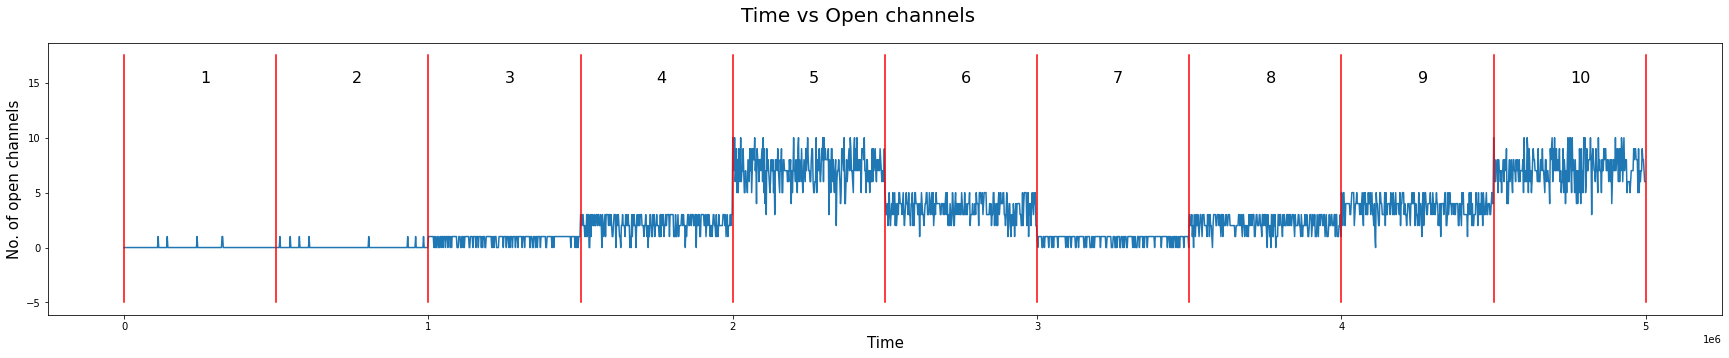

In [0]:
# Plot of time against number of open channels
fig = plt.figure(figsize=(30, 5))
# Every 2000th point has been plotted
plt.plot(range(0, len(train_df['time']), 2000), train_df['open_channels'][0::2000])
fig.suptitle('Time vs Open channels', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('No. of open channels', fontsize=15)
for x in range(0, int(len(train_df['time'])+1), int(len(train_df['time'])/10)):
    plt.plot([x, x], [-5, 17.5], 'r')
for x in range(0, 10):    
    plt.text(x*500000+250000, 15, str(x+1), fontsize=16)
plt.show()

### Histogram analysis

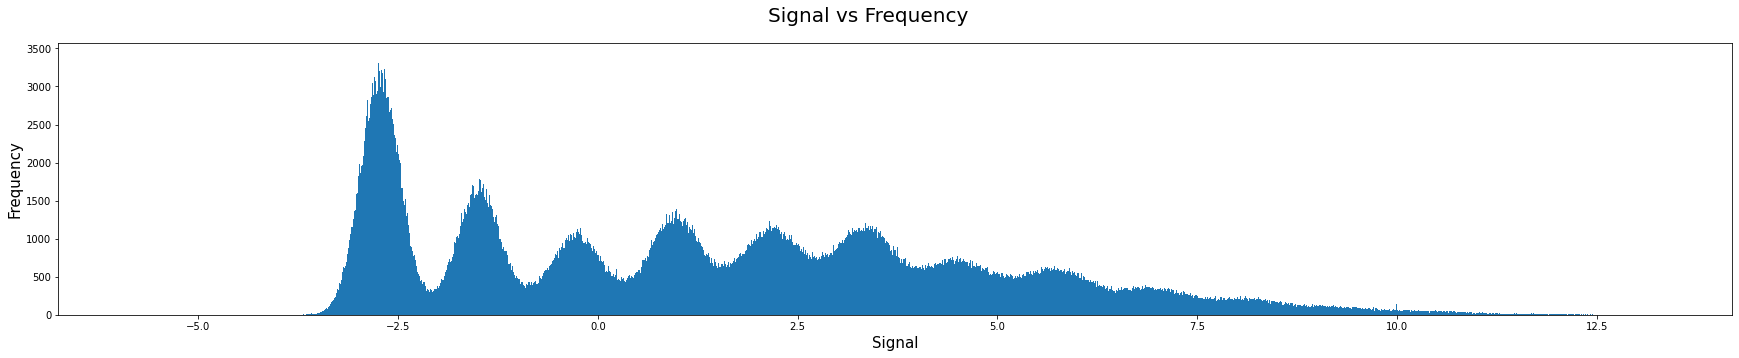

In [0]:
fig = plt.figure(figsize=(30, 5))
plt.hist(train_df.iloc[:, 1], bins=10000)
fig.suptitle('Signal vs Frequency', fontsize=20)
plt.xlabel('Signal', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

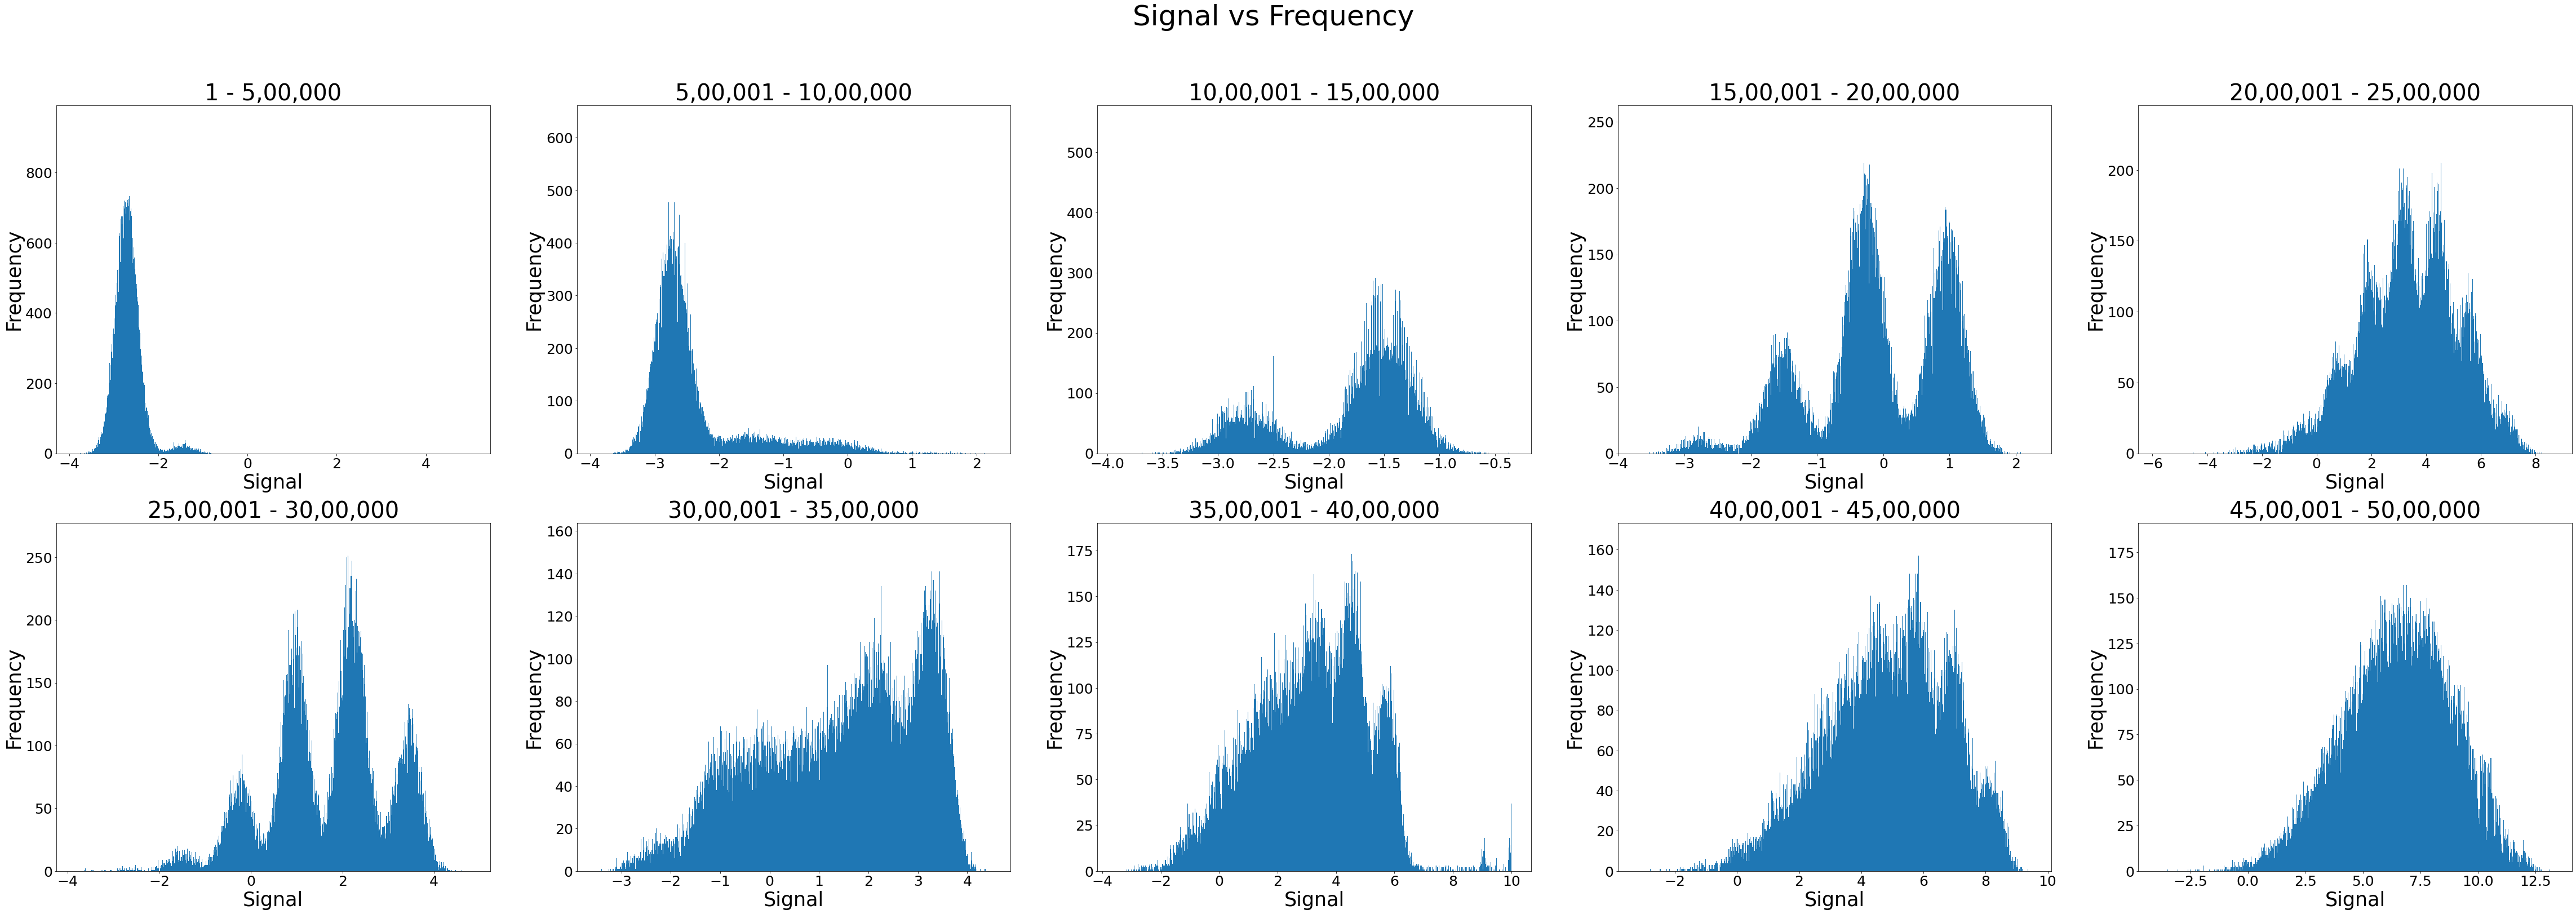

In [0]:
data = []
i = 0
while i<5000000:
  data.append(train_df.iloc[i:i+500000, 1])
  i += 500000

titles = ['1 - 5,00,000', '5,00,001 - 10,00,000', '10,00,001 - 15,00,000', '15,00,001 - 20,00,000', '20,00,001 - 25,00,000',
          '25,00,001 - 30,00,000', '30,00,001 - 35,00,000', '35,00,001 - 40,00,000', '40,00,001 - 45,00,000', '45,00,001 - 50,00,000']
xaxes = ['Signal']*10
yaxes = ['Frequency']*10

fig, a = plt.subplots(2, 5, figsize=(80, 25))
fig.suptitle('Signal vs Frequency', fontsize=50)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx], bins=10000)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.set_title(titles[idx], fontsize=40)
    ax.set_xlabel(xaxes[idx], fontsize=35)
    ax.set_ylabel(yaxes[idx], fontsize=35)
plt.show()

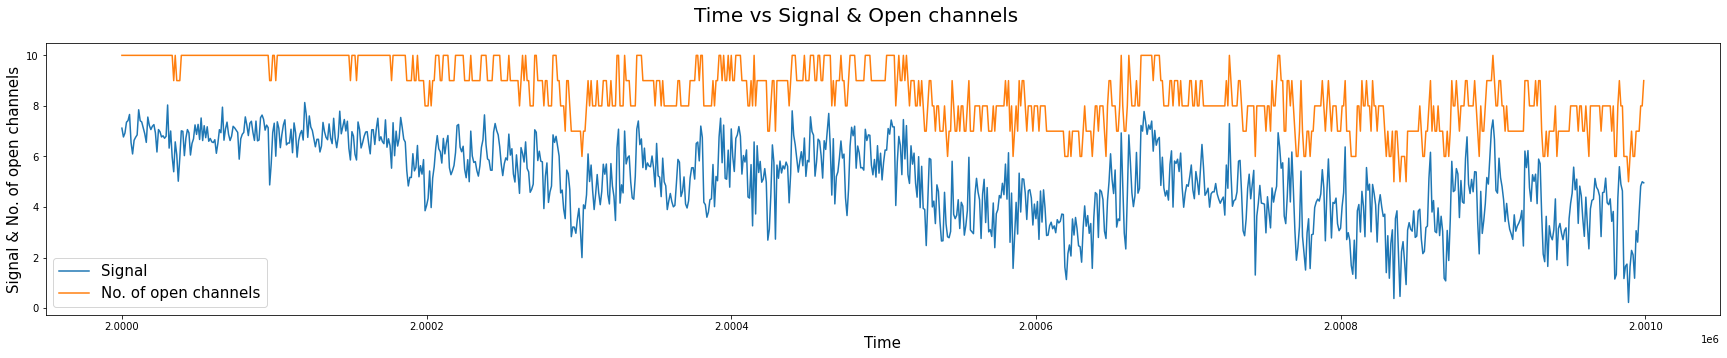

In [0]:
fig = plt.figure(figsize=(30, 5))
plt.plot(range(2000000, 2001000), train_df['signal'].iloc[2000000: 2001000], label='Signal')
plt.plot(range(2000000, 2001000), train_df['open_channels'].iloc[2000000: 2001000], label='No. of open channels')
fig.suptitle('Time vs Signal & Open channels', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal & No. of open channels', fontsize=15)
plt.legend(loc='best', prop={'size': 15})
plt.show()

## Data Preprocessing

### Curve fitting

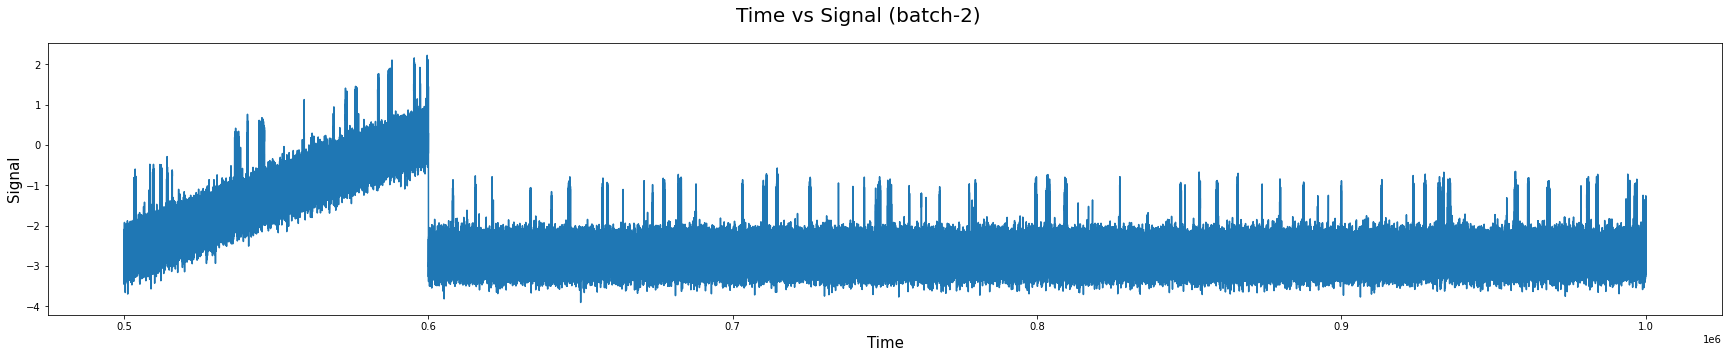

In [0]:
fig = plt.figure(figsize=(30, 5))
batch_2 = train_df['signal'].iloc[500000: 1000000]
plt.plot(range(500000, len(batch_2)*2), batch_2)
fig.suptitle('Time vs Signal (batch-2)', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
plt.show()

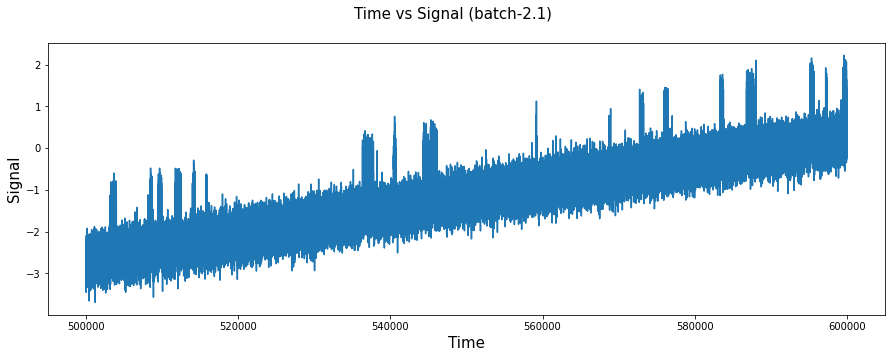

In [0]:
fig = plt.figure(figsize=(15, 5))
batch_2_1 = train_df['signal'].iloc[500000: 600000]
plt.plot(range(500000, len(batch_2)+100000), batch_2_1)
fig.suptitle('Time vs Signal (batch-2.1)', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
plt.show()

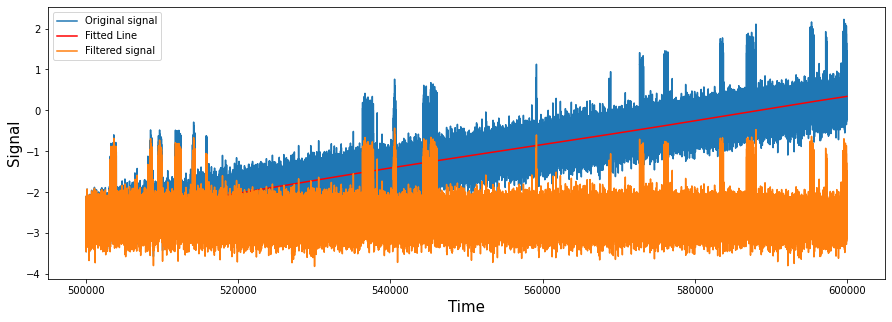

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [0]:
model = np.poly1d(np.polyfit(range(500000, 600000), batch_2_1, 5))
plt.figure(figsize=(15, 5))
plt.plot(batch_2_1, label='Original signal')
line = range(500000, 600000)
yhat = model(line)
filtered_sig = batch_2_1-yhat
plt.plot(line, yhat, 'r', label='Fitted Line')
plt.plot(line, filtered_sig-(filtered_sig.iloc[0]-batch_2_1.iloc[0]), label='Filtered signal')
fig.suptitle('Time vs Signal (batch-2.1)', fontsize=15)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
plt.legend(loc='best')
plt.show()
filtered_signal = np.real(filtered_sig-(filtered_sig.iloc[0]-batch_2_1.iloc[0]))
train_df['signal'][500000: 600000] = filtered_signal

#### Fourier Transform

In [0]:
from scipy import fftpack

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


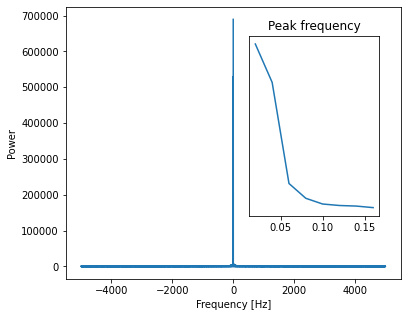

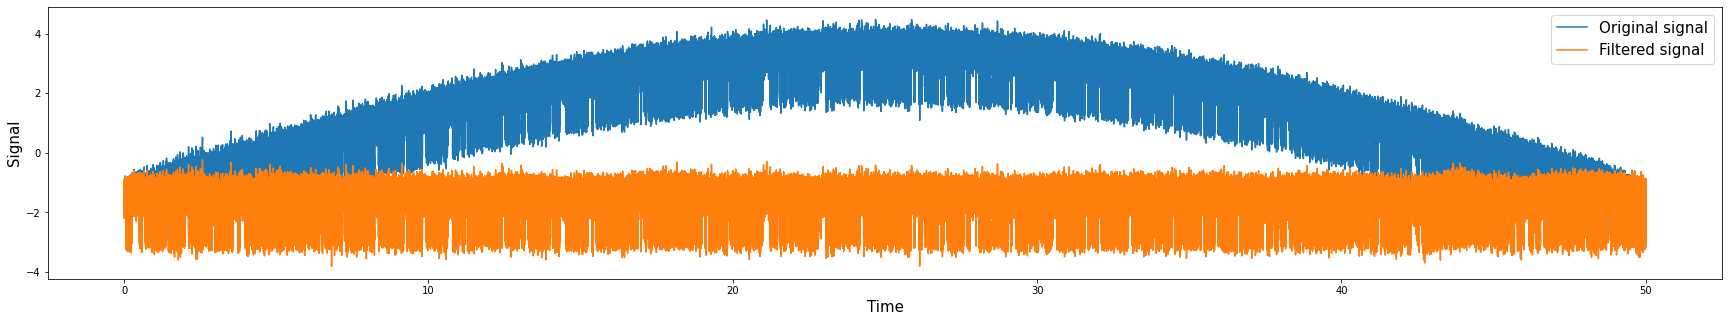

In [0]:
sig = np.array(train_df['signal'].iloc[3000000:3500000])
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=0.0001)

plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./15)

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) < peak_freq+0.38] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

time_vec = np.arange(0, 50, 0.0001)

plt.figure(figsize=(30, 5))
plt.plot(time_vec, sig, label='Original signal')
filtered_signal = np.real(filtered_sig-(filtered_sig[0]-sig[0]))

train_df['signal'][3000000:3500000] = filtered_signal

plt.plot(time_vec, filtered_signal, label='Filtered signal')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)

plt.legend(loc='best', prop={'size': 15})
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


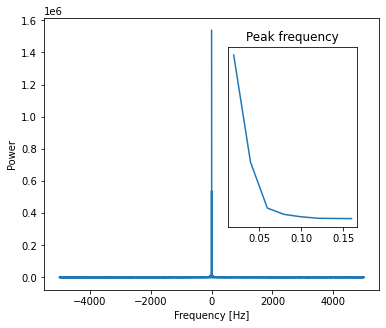

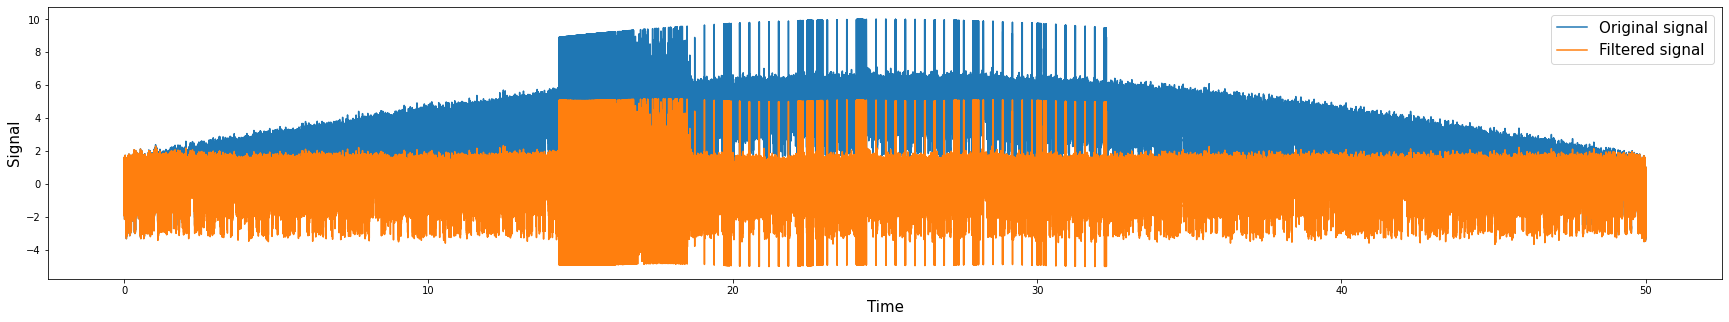

In [0]:
sig = np.array(train_df['signal'].iloc[3500000:4000000])
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=0.0001)

plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./15)

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) < peak_freq+0.18] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

time_vec = np.arange(0, 50, 0.0001)

plt.figure(figsize=(30, 5))
plt.plot(time_vec, sig, label='Original signal')
filtered_signal = np.real(filtered_sig-(filtered_sig[0]-sig[0]))

train_df['signal'][3500000:4000000] = filtered_signal

plt.plot(time_vec, filtered_signal, label='Filtered signal')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)

plt.legend(loc='best', prop={'size': 15})
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


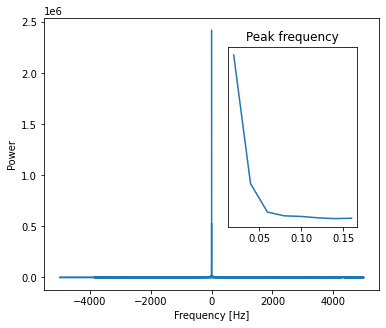

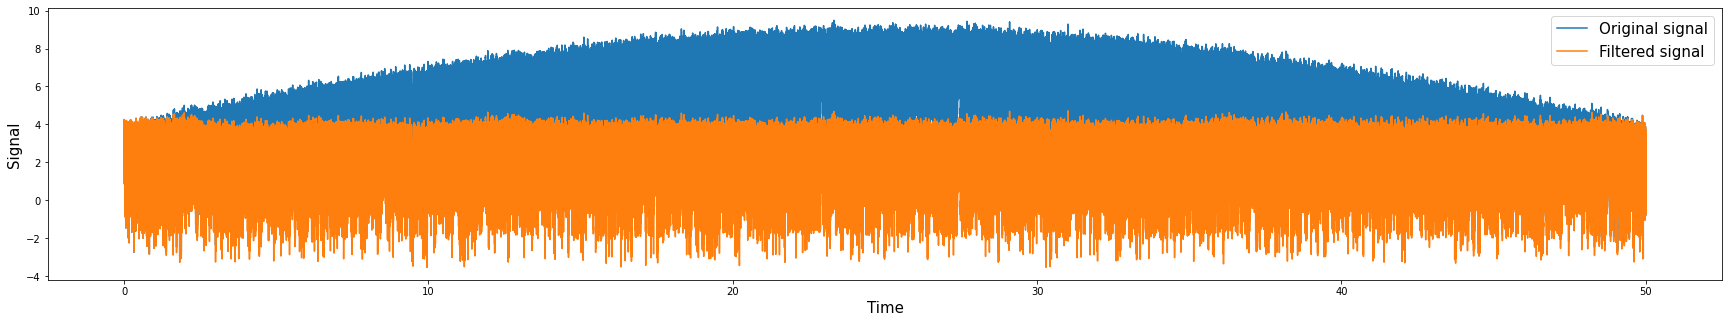

In [0]:
sig = np.array(train_df['signal'].iloc[4000000:4500000])
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=0.0001)

plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./15)

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) < peak_freq+0.18] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

time_vec = np.arange(0, 50, 0.0001)

plt.figure(figsize=(30, 5))
plt.plot(time_vec, sig, label='Original signal')
filtered_signal = np.real(filtered_sig-(filtered_sig[0]-sig[0]))

train_df['signal'][4000000:4500000] = filtered_signal

plt.plot(time_vec, filtered_signal, label='Filtered signal')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)

plt.legend(loc='best', prop={'size': 15})
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


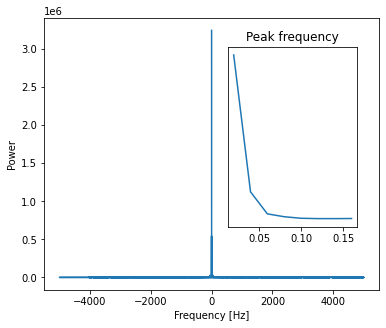

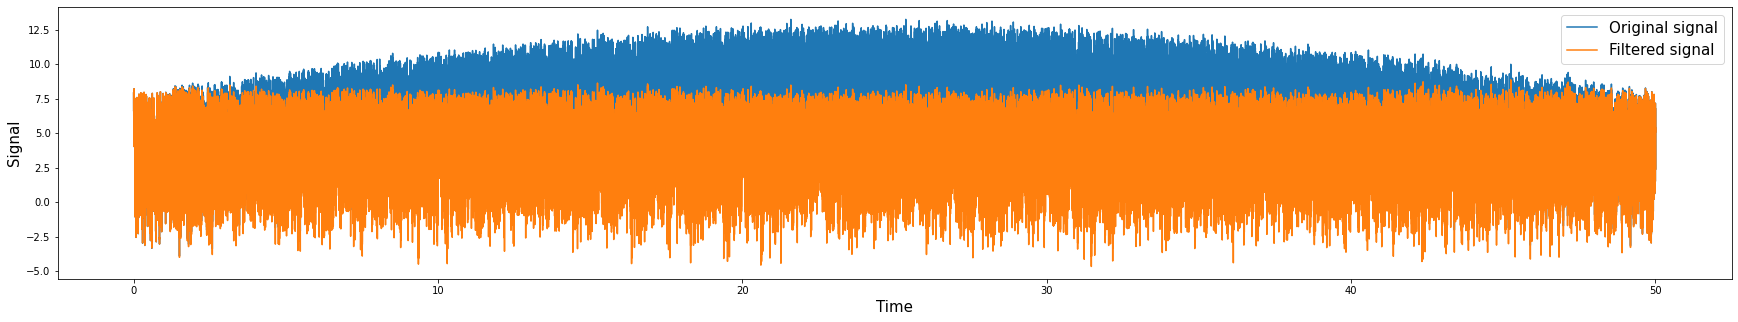

In [0]:
sig = np.array(train_df['signal'].iloc[4500000:5000000])
sig_fft = fftpack.fft(sig)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(sig.size, d=0.0001)

plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./15)

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) < peak_freq+0.18] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

time_vec = np.arange(0, 50, 0.0001)

plt.figure(figsize=(30, 5))
plt.plot(time_vec, sig, label='Original signal')
filtered_signal = np.real(filtered_sig-(filtered_sig[0]-sig[0]))

train_df['signal'][4500000:5000000] = filtered_signal

plt.plot(time_vec, filtered_signal, label='Filtered signal')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)

plt.legend(loc='best', prop={'size': 15})
plt.show()

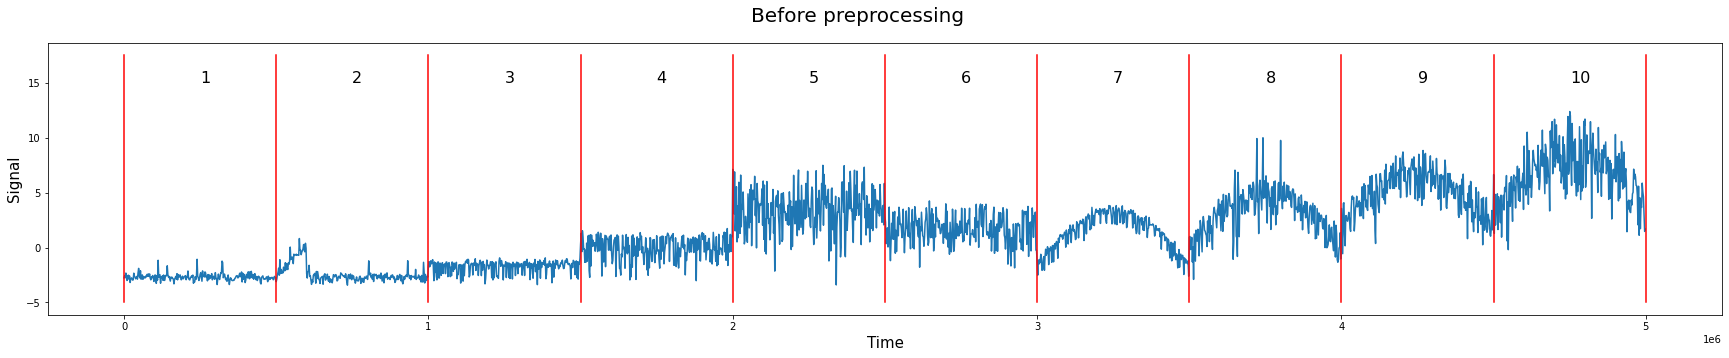

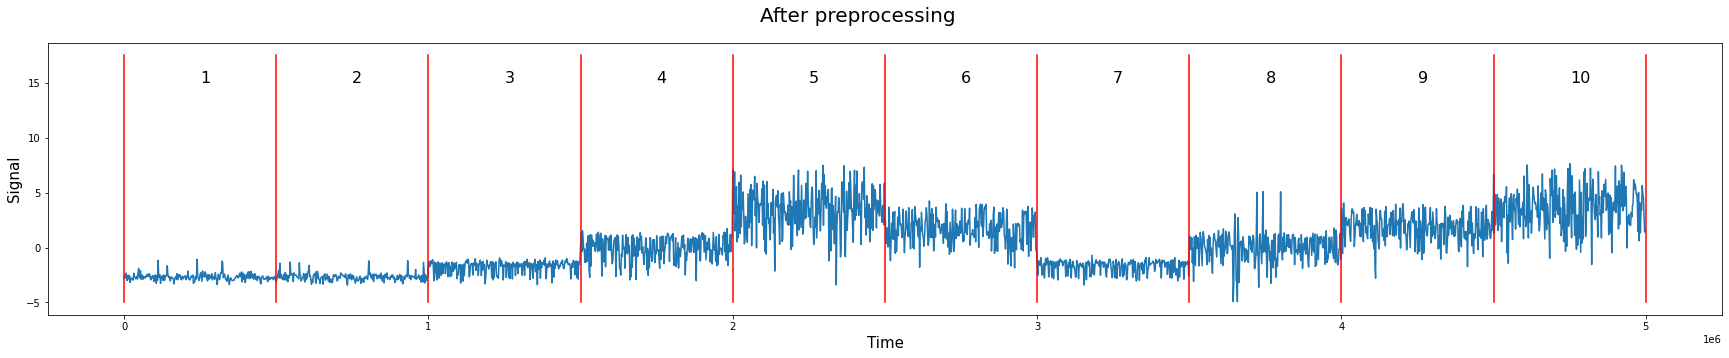

In [0]:
# Every 2000th point has been plotted
fig = plt.figure(figsize=(30, 5))
df = pd.read_csv('/content/drive/My Drive/Ion_Channel/Kaggle_dataset/train.csv')
plt.plot(range(0, len(df['time']), 2000), df['signal'][0::2000])
fig.suptitle('Before preprocessing', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
for x in range(0, int(len(train_df['time'])+1), int(len(train_df['time'])/10)):
    plt.plot([x, x], [-5, 17.5], 'r')
for x in range(0, 10):    
    plt.text(x*500000+250000, 15, str(x+1), fontsize=16)
plt.show()


fig = plt.figure(figsize=(30, 5))
plt.plot(range(0, len(train_df['time']), 2000), train_df['signal'][0::2000])
fig.suptitle('After preprocessing', fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Signal', fontsize=15)
for x in range(0, int(len(train_df['time'])+1), int(len(train_df['time'])/10)):
    plt.plot([x, x], [-5, 17.5], 'r')
for x in range(0, 10):    
    plt.text(x*500000+250000, 15, str(x+1), fontsize=16)
plt.show()

### Histogram after preprocessing

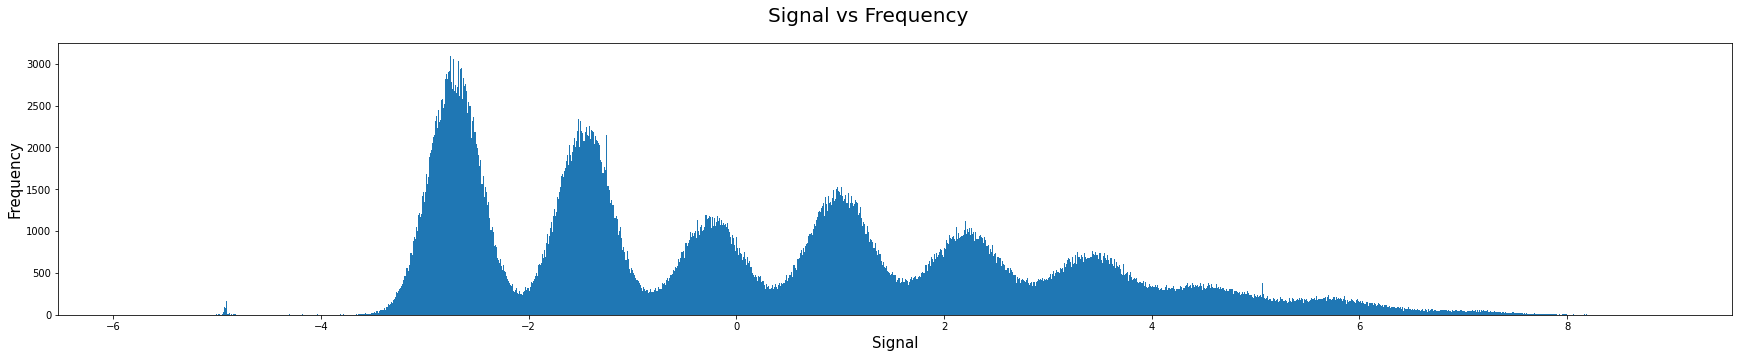

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Ion_Channel/Kaggle_dataset/train_clean.csv')
fig = plt.figure(figsize=(30, 5))
plt.hist(train_df.iloc[:, 1], bins=10000)
fig.suptitle('Signal vs Frequency', fontsize=20)
plt.xlabel('Signal', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

### Drift removal from the data has been done!

### Exporting the dataframe as a csv file

In [0]:
train_df.to_csv('/content/drive/My Drive/Ion_Channel/Kaggle_dataset/train_clean.csv',index=False,float_format='%.4f')

### Test data drift removal

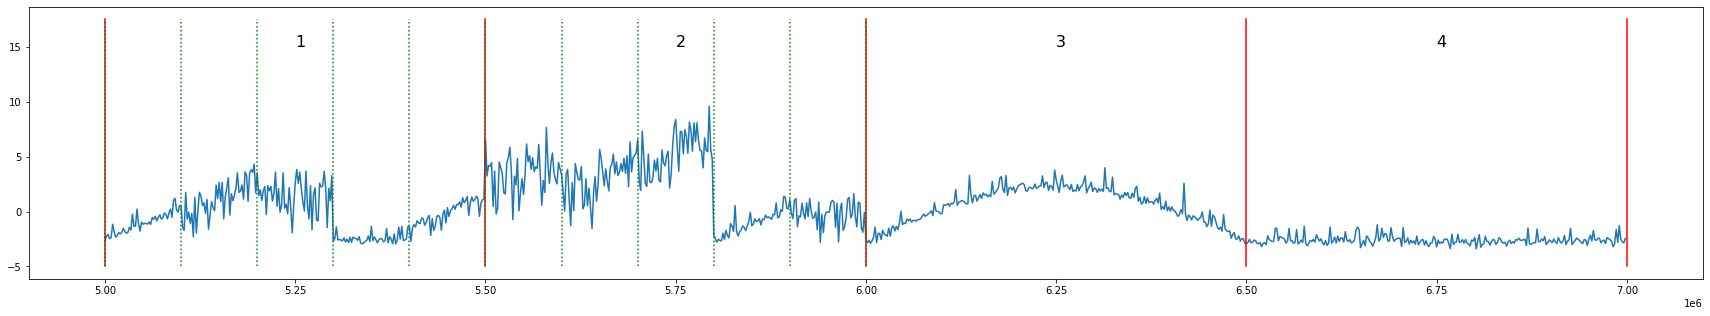

In [0]:
# Plot of time against signal values
plt.figure(figsize=(30, 5))
# Every 2000th point has been plotted
plt.plot(range(5000000, len(test_df['time'])+5000000, 2000), test_df['signal'][0::2000])
for x in range(0, 4):    
    plt.text(x*500000+5250000, 15, str(x+1), fontsize=16)
for x in range(0, int(len(test_df['time'])+1), int(len(test_df['time'])/4)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'r')
for x in range(0, int(len(test_df['time'])/2+1), int(len(test_df['time'])/20)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'g:')
plt.show()

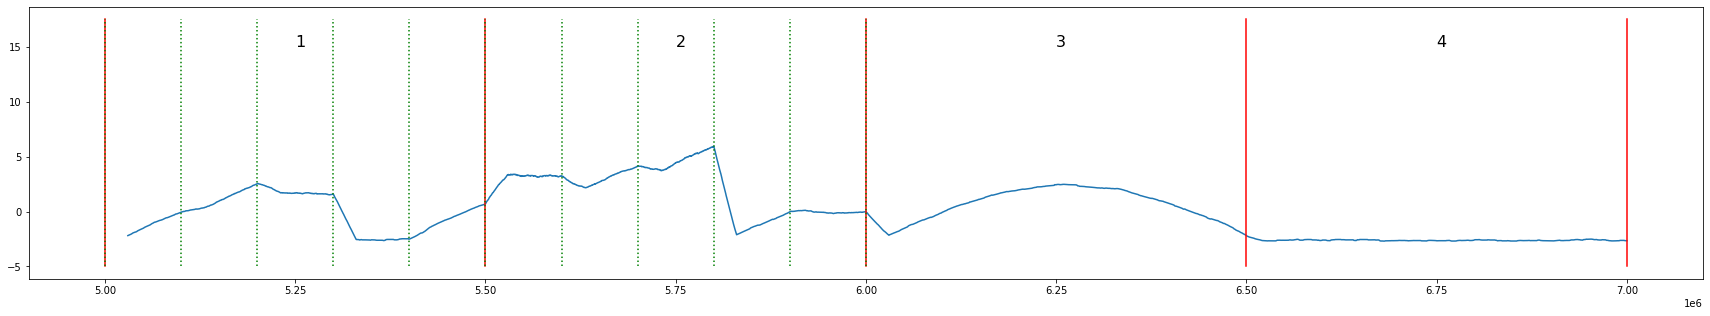

In [0]:
test_roll_mean = test_df['signal'].copy()
# Rolling window reduces the coarseness of the signal and gives us a clear picture
test_roll_mean = test_roll_mean.rolling(30000).mean() # sokabe
plt.figure(figsize=(30, 5))
plt.plot(range(5000000, len(test_df['time'])+5000000), test_roll_mean)
for x in range(0, 4):    
    plt.text(x*500000+5250000, 15, str(x+1), fontsize=16)
for x in range(0, int(len(test_df['time'])+1), int(len(test_df['time'])/4)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'r')
for x in range(0, int(len(test_df['time'])/2+1), int(len(test_df['time'])/20)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'g:')
plt.show()

In [0]:
test_batch_3 = test_df['signal'].iloc[1000000: 1500000].copy()
test_batch_3.shape

(500000,)

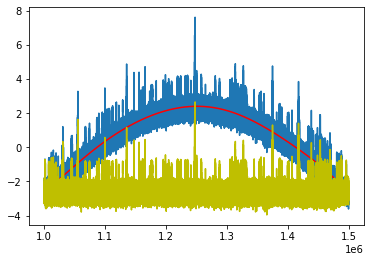

In [0]:
model = np.poly1d(np.polyfit(range(1000000, 1500000), test_batch_3, 5))
# plt.plot(line, filtered_sig-(filtered_sig.iloc[0]-test_batch_3.iloc[0]), 'y')
plt.plot(test_batch_3)
line = range(1000000, 1500000)
yhat = model(line)
filtered_sig = test_batch_3-yhat
plt.plot(line, yhat, 'r')
plt.plot(line, filtered_sig-(filtered_sig.iloc[0]-test_batch_3.iloc[0]), 'y')

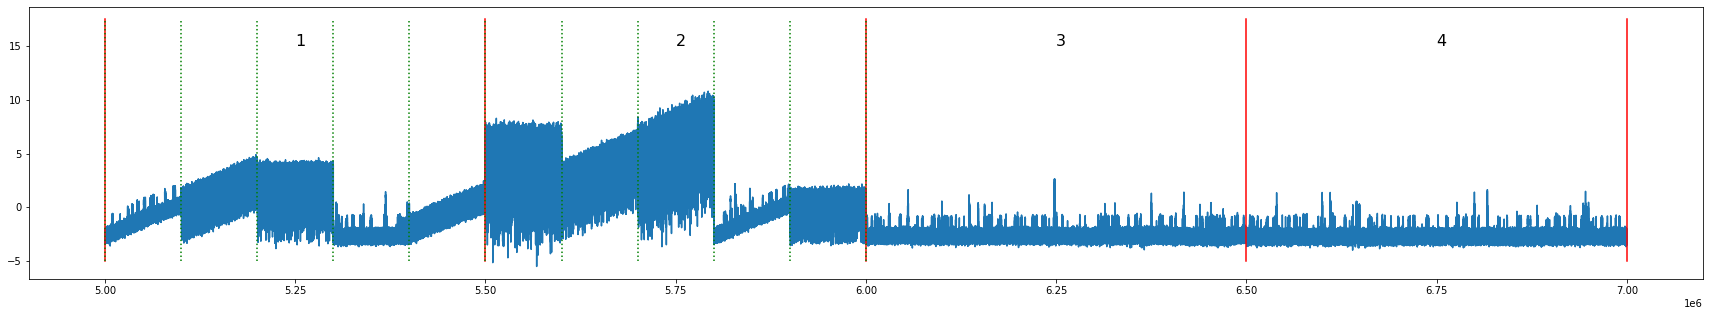

In [0]:
test_df['signal'][1000000: 1500000] = filtered_sig-(filtered_sig.iloc[0]-test_batch_3.iloc[0])

plt.figure(figsize=(30, 5))
plt.plot(range(5000000, len(test_df['time'])+5000000), test_df['signal'])
for x in range(0, 4):    
    plt.text(x*500000+5250000, 15, str(x+1), fontsize=16)
for x in range(0, int(len(test_df['time'])+1), int(len(test_df['time'])/4)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'r')
for x in range(0, int(len(test_df['time'])/2+1), int(len(test_df['time'])/20)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'g:')
plt.show()

## to clean - batches 1_1, 1_2, 1_5, 2_2, 2_3, 2_4

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


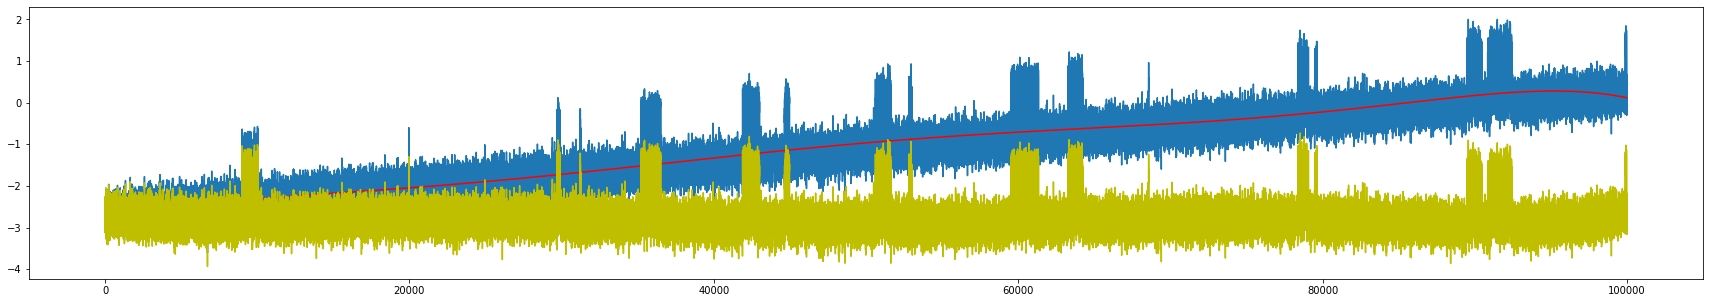

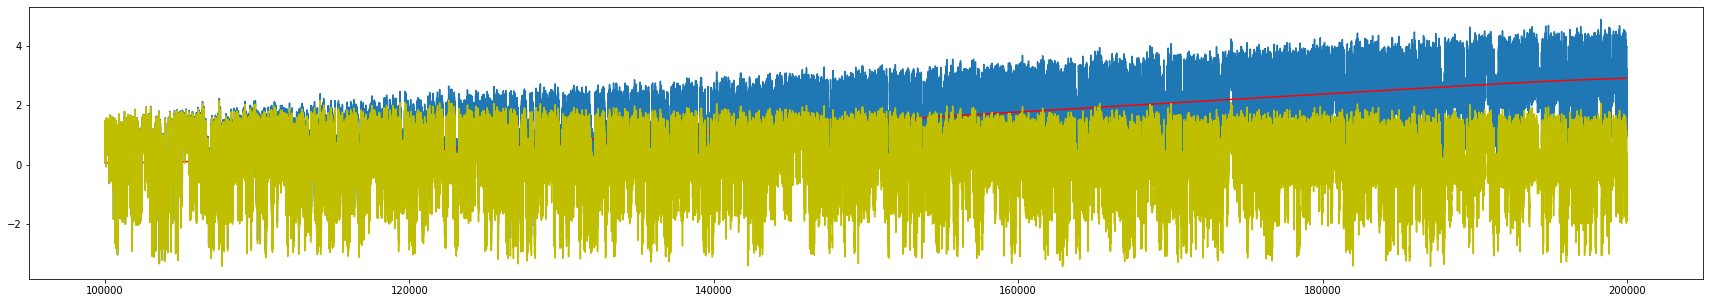

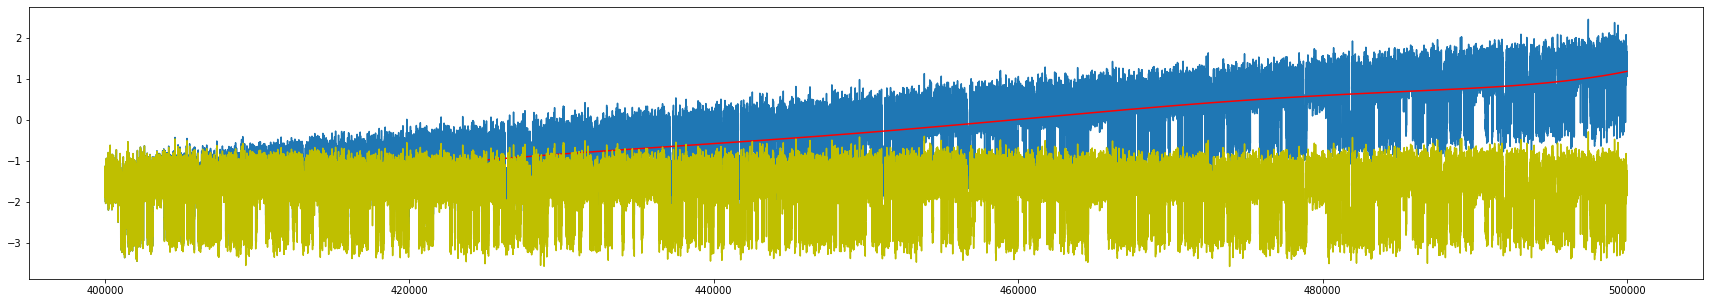

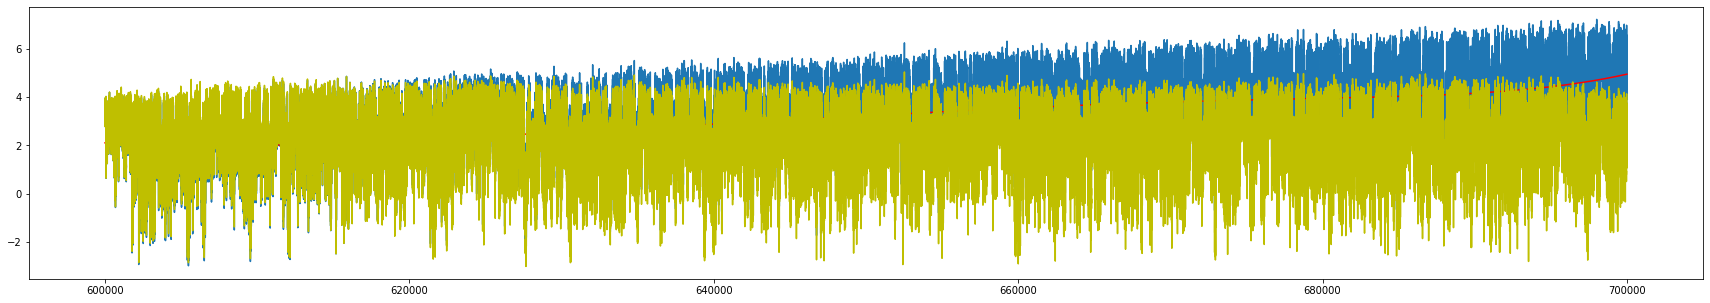

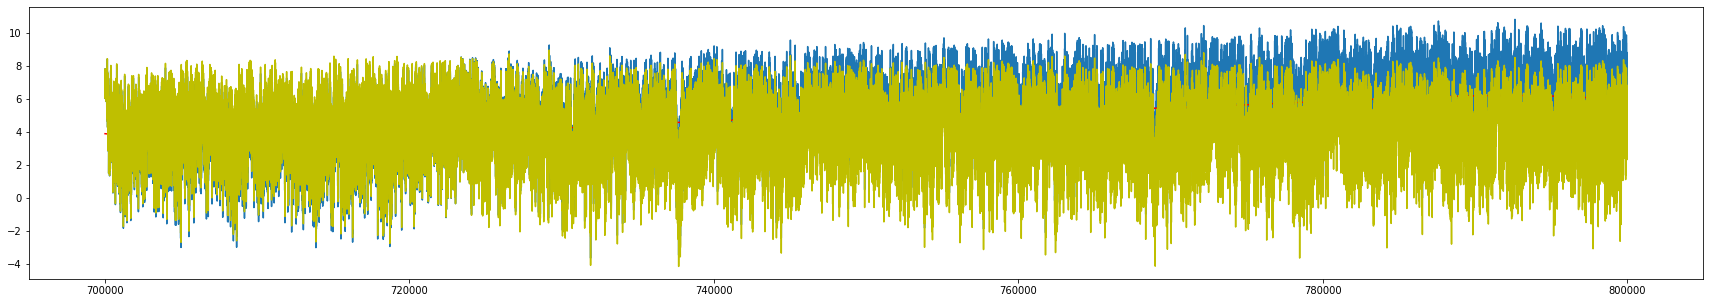

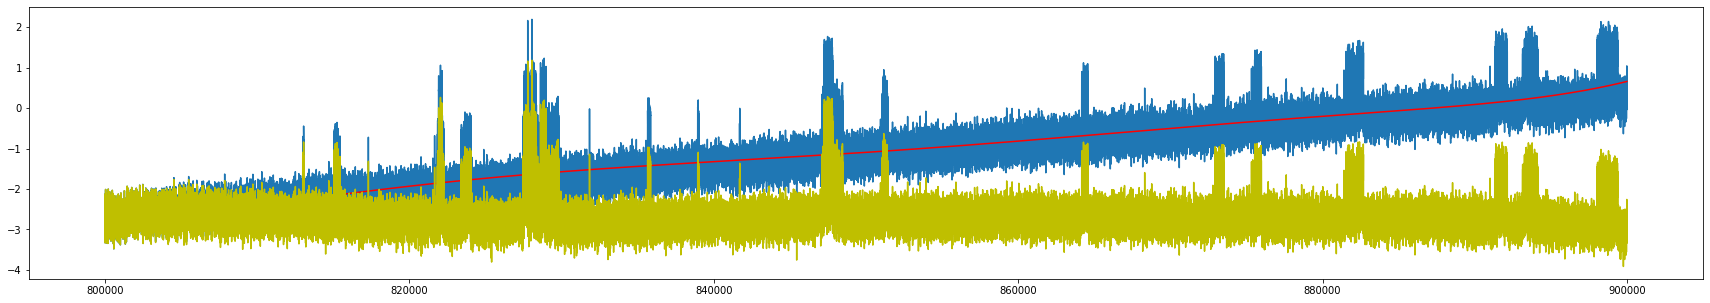

In [0]:
a = np.array([0, 100000, 400000, 600000, 700000, 800000])

for i in a:
    plt.figure(figsize=(30, 5))
    y = test_df['signal'].iloc[i: i+100000]
    model = np.poly1d(np.polyfit(range(i, i+100000), y, 5))
    # plt.plot(line, filtered_sig-(filtered_sig.iloc[0]-test_batch_3.iloc[0]), 'y')
    plt.plot(y)
    line = range(i, i+100000)
    yhat = model(line)
    filtered_sig = y-yhat
    plt.plot(line, yhat, 'r')
    plt.plot(line, filtered_sig-(filtered_sig.iloc[0]-y.iloc[0]), 'y')
    
    test_df['signal'][i: i+100000] = filtered_sig-(filtered_sig.iloc[0]-y.iloc[0])

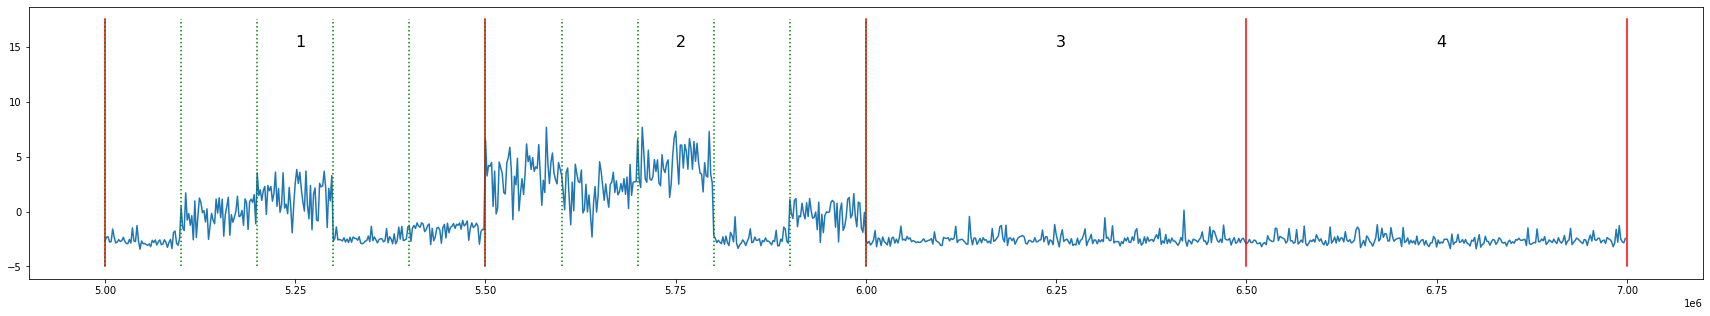

In [0]:
plt.figure(figsize=(30, 5))
plt.plot(range(5000000, len(test_df['time'])+5000000, 2000), test_df['signal'][0::2000])
for x in range(0, 4):    
    plt.text(x*500000+5250000, 15, str(x+1), fontsize=16)
for x in range(0, int(len(test_df['time'])+1), int(len(test_df['time'])/4)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'r')
for x in range(0, int(len(test_df['time'])/2+1), int(len(test_df['time'])/20)):
    plt.plot([x+5000000, x+5000000], [-5, 17.5], 'g:')
plt.show()

In [0]:
test_df.to_csv('test_clean.csv')